In [1]:
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.io import imsave
import glob
import pandas as pd
from matplotlib import rcParams
rcParams['figure.dpi']=200

In [2]:
SAMPLE = 'TNP_pilot_cycif'
# SAMPLE = 'PilotTonsil_5_z08' # This is the codex sample, folder was renamed to match the actual files coming out from the mcmicro run. 

DATA_DIR = f'data/{SAMPLE}' 

In [3]:
images = sorted(glob.glob(f"{DATA_DIR}/*/*tif") + glob.glob(f"{DATA_DIR}/*/*/*tif"))
images

['data/TNP_pilot_cycif/probability-maps/unmicst/TNP_pilot_cycif_Probabilities_0.tif',
 'data/TNP_pilot_cycif/registration/TNP_pilot_cycif.ome.tif',
 'data/TNP_pilot_cycif/registration/TNP_pilot_cycif_subset.ome.tif',
 'data/TNP_pilot_cycif/segmentation/mesmer-TNP_pilot_cycif/cell_Boundary_subset.tif',
 'data/TNP_pilot_cycif/segmentation/mesmer-TNP_pilot_cycif/cell_Mask_subset.tif',
 'data/TNP_pilot_cycif/segmentation/unmicst-TNP_pilot_cycif/cellMask.tif',
 'data/TNP_pilot_cycif/segmentation/unmicst-TNP_pilot_cycif/cellMask_subset.tif',
 'data/TNP_pilot_cycif/segmentation/unmicst-TNP_pilot_cycif/cellRingMask.tif',
 'data/TNP_pilot_cycif/segmentation/unmicst-TNP_pilot_cycif/cytoMask.tif',
 'data/TNP_pilot_cycif/segmentation/unmicst-TNP_pilot_cycif/cytoRingMask.tif',
 'data/TNP_pilot_cycif/segmentation/unmicst-TNP_pilot_cycif/nucleiMask.tif',
 'data/TNP_pilot_cycif/segmentation/unmicst-TNP_pilot_cycif/nucleiRingMask.tif']

## ome-tiff

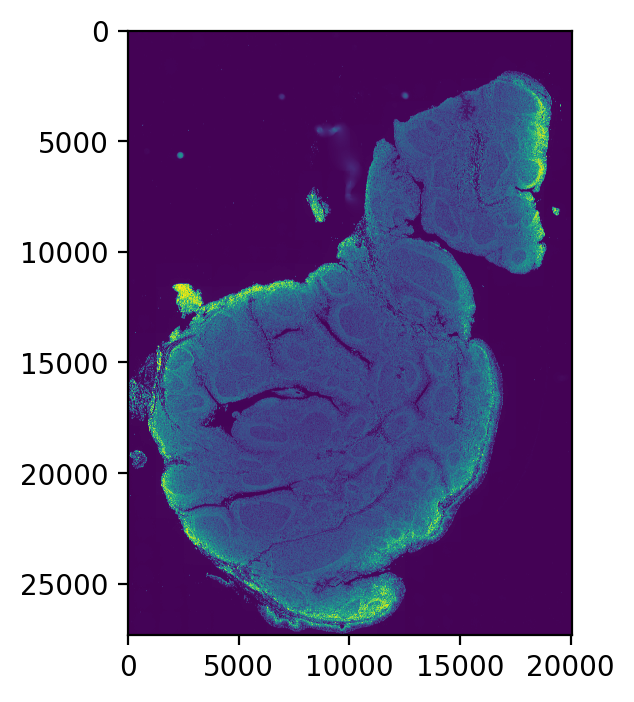

In [4]:
img = imread(images[1])
plt.imshow(img[0,...])

## The full sample is too big, get a subset
Different ranges for CyCIF and CODEX

In [65]:
### CYCIF
## 4000 * 4000
# x_min = 16000
# x_max = 20000
# y_min = 7500
# y_max = 11500


# # 1000 * 1000
# x_min = 15400
# x_max = 16400
# y_min = 8750
# y_max = 9750

# # 800 * 800
# x_min = 15400
# x_max = x_min+800
# y_min = 8750
# y_max = y_min+800

# # 500 * 500
# x_min = 15400
# x_max = x_min+500
# y_min = 8750
# y_max = y_min+500

# 200 * 200
x_min = 15400
x_max = x_min+200
y_min = 8750
y_max = y_min+200




# ### CODEX
# # 1000 * 1000
# x_min = 500
# x_max = x_min+1000
# y_min = 6000
# y_max = y_min+1000

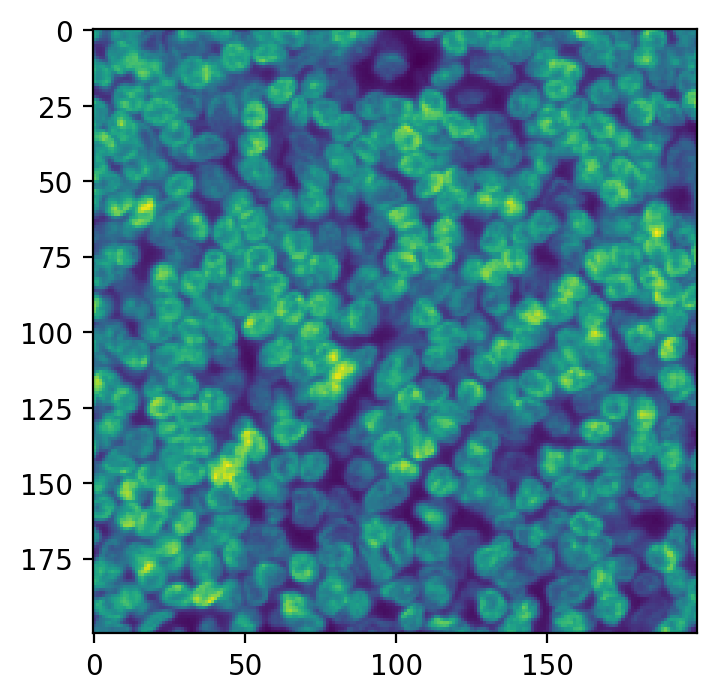

In [66]:
plt.imshow(img[0, x_min:x_max, y_min:y_max])

## Marker files
The markers.csv is messing the header. Similar file for CyCIF data has been fixed but not this one.

In [67]:
markers = pd.read_csv(f'{DATA_DIR}/markers.csv',header = None).iloc[:,0]
markers

0        marker_name
1           Hoechst1
2               A488
3               A555
4               A647
5           Hoechst2
6     anti_NaKATPase
7           anti_CD3
8        anti_CD45RO
9           Hoechst3
10          Ki67_488
11       Keratin_570
12          aSMA_660
13          Hoechst4
14          CD8a_488
15           CD4_570
16          CD45_647
17          Hoechst5
18          CD20_488
19         CD11c_555
20           PD1_647
21          Hoechst6
22          CD68_488
23         FOXP3_570
24          PDL1_647
25          Hoechst7
26         CD163_488
27             H3_PE
28          CD31_647
29          Hoechst8
30          Ecad_488
31      Vimentin_555
32       Catenin_647
33          Hoechst9
34       LaminAC_488
35           pH3_555
36          H2ax_647
Name: 0, dtype: object

## Save ome-tiff subset 

In [68]:
im_selected = img[:,x_min:x_max, y_min:y_max]
patch_name = images[1].replace('.ome','_subset.ome')
imsave(patch_name,im_selected)

In [69]:
im1 = imread(patch_name)
im1.shape

(36, 200, 200)

## Segmentation mask and save subset

/tmp/ipykernel_3246/1628176482.py:7: UserWarning: data/TNP_pilot_cycif/segmentation/unmicst-TNP_pilot_cycif/cellMask_subset.tif is a low contrast image
  imsave(patch_name,img1)


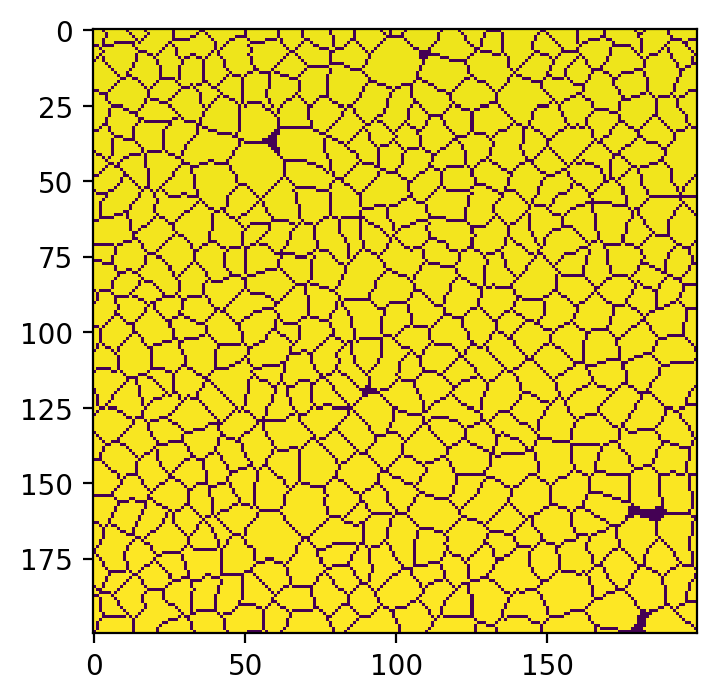

In [70]:
seg_mask_fname = f'{DATA_DIR}/segmentation/unmicst-{SAMPLE}/cellMask.tif'

img1 = imread(seg_mask_fname)[x_min:x_max, y_min:y_max]
plt.imshow(img1)

patch_name = seg_mask_fname.replace('.tif','_subset.tif')
imsave(patch_name,img1)